# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating data to view and fit

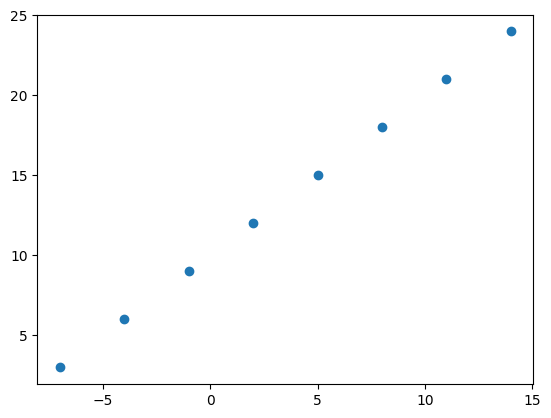

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels

y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([937000])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([937000], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
# Turn our NumPy arrays into tensors
X = tf.constant(X, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

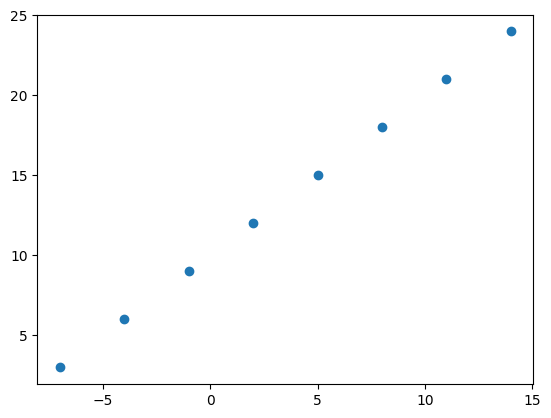

In [ ]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1. Creating a model - define the input and the output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss function (in other words, the function whicj tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can you to interpret the perfomance of our model).
3. Fitting a model - letting the model try to find patterns between X and y

In [ ]:
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae = mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd = stochastic gradient descent
              metrics=["mae"]
              )

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 320ms/step - loss: 10.1984 - mae: 10.1984
Epoch 2/5
1/1 [==============================] - 0s 14ms/step - loss: 10.0659 - mae: 10.0659
Epoch 3/5
1/1 [==============================] - 0s 15ms/step - loss: 9.9334 - mae: 9.9334
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 9.8009 - mae: 9.8009
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 9.6684 - mae: 9.6684


In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 49ms/step


array([[19.061316]], dtype=float32)

## Imporving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - add more layers, increase the number of hidden units (aka neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - fit a model for more **epochs** (leave it training for longer) or on more data.

In [ ]:
# Let's rebuild our model

tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 342ms/step - loss: 8.5363 - mae: 8.5363
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 8.4038 - mae: 8.4038
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 8.2713 - mae: 8.2713
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 8.1388 - mae: 8.1388
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 8.0063 - mae: 8.0063
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 7.8738 - mae: 7.8738
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 7.7413 - mae: 7.7413
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 7.6088 - mae: 7.6088
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 7.4763 - mae: 7.4763
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 7.4325 - mae: 7.4325
Epoch 11/100
1/1 [==============================] - 0s 11ms/step - lo

In [ ]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's see if our model's prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 87ms/step


array([[30.237001]], dtype=float32)

In [ ]:
P = tf.expand_dims(X, axis=-1)

In [ ]:
# Improve the number of neurones

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None), # "relu"
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

model.fit(P, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 719ms/step - loss: 13.9538 - mae: 13.9538
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 13.8560 - mae: 13.8560
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 13.7584 - mae: 13.7584
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 13.6607 - mae: 13.6607
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 13.5632 - mae: 13.5632
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 13.4656 - mae: 13.4656
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 13.3681 - mae: 13.3681
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 13.2707 - mae: 13.2707
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 13.1732 - mae: 13.1732
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 13.0757 - mae: 13.0757
Epoch 11/100
1/1 [==============================]

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 91ms/step


array([[30.444412]], dtype=float32)

## Evaluting a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a mode -> fit it -> evaluate it -> tweak a mode -> fit it -> evaluate it...
```

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [ ]:
# Make a bigger dataset

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

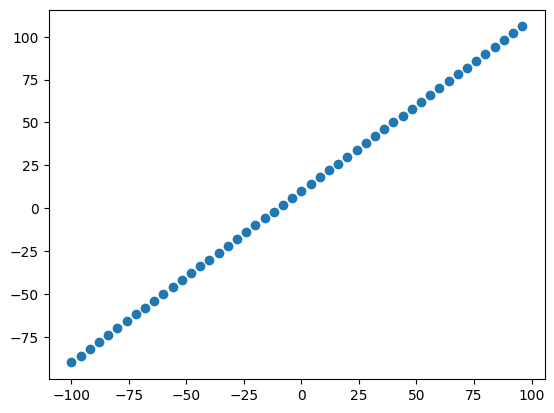

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...

* Training dataset (model learning 70%-80% of all dataset)
* Validation dataset (model gets tuned on this data 10%-15% of all dataset)
* Test dataset (model gets evaluated 10%-15% of all dataset)

In [ ]:
X_train = X[:40]
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

### Visualizing the data

Now we've got out data in training and test sets... let's visualize it again!

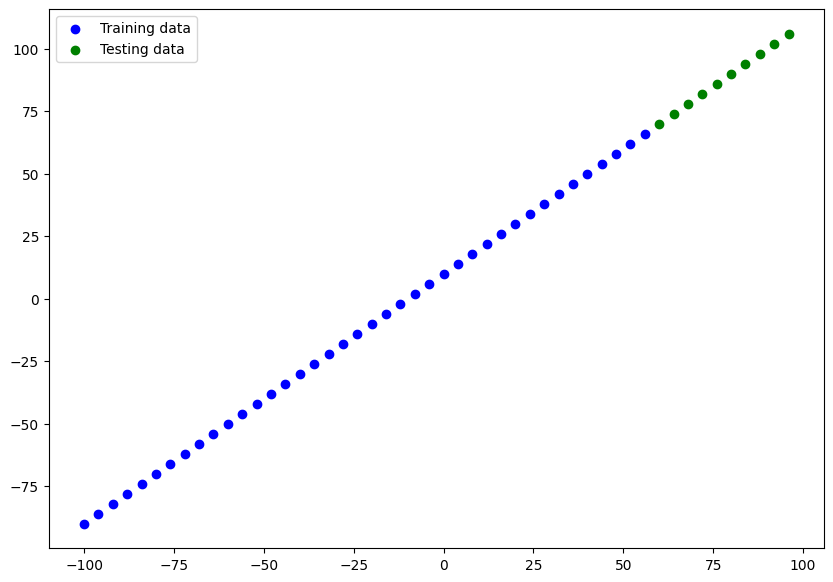

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend
plt.legend();

In [ ]:
# Let's have a look at how to build a neural network for our data

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.mae,
              metrics=["mae"])

# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

### Visualizing the model

In [ ]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [ ]:
# building automatically by defining the input_shape

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=[1], name="input_layer", activation='relu'),
    tf.keras.layers.Dense(1, name="ouput_layer")
], name="one_of_many_models")

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.mae,
              metrics=["mae"])

In [ ]:
model.summary()

Model: "one_of_many_models"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 50)                100       
                                                                 
 ouput_layer (Dense)         (None, 1)                 51        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - len([x_train, y_train, z_train, ...]) * n + Non-trainable params
* Trainable params - paramaters, that model can update as it trains. (len([x_train, y_train, z_train, ...]) * n)
* Non-trainable params - parameters, than cannot be updated (constant tensors)

In [ ]:
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

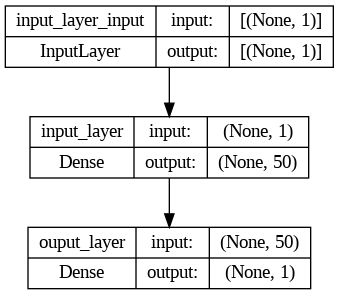

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot against the ground truth labels. (`y_true=y_test` vs `y_pred`)

In [ ]:
y_pred = model.predict(X_test)
len(y_pred)

1/1 [==============================] - 0s 44ms/step


10

In [ ]:
y_pred, y_test

(array([[ 71.31325 ],
        [ 75.39937 ],
        [ 79.48547 ],
        [ 83.5716  ],
        [ 87.657715],
        [ 91.74383 ],
        [ 95.82995 ],
        [ 99.91605 ],
        [104.00217 ],
        [108.08828 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [ ]:
# Create a plotting func
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend()

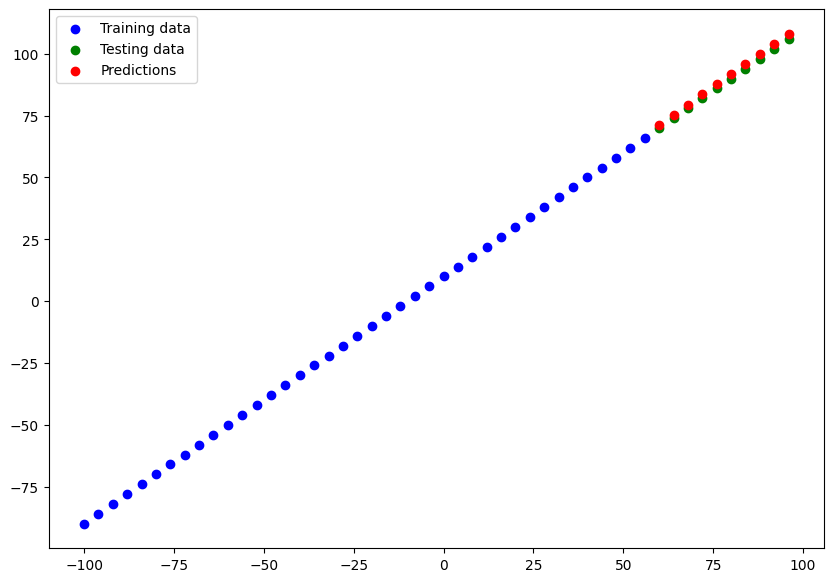

In [ ]:
plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error: `abs(real-pred)` `tf.keras.losses.mae()`
* MSE - mean square error `(real-pred) ** 2` `tf.keras.losses.mse()`


In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 103ms/step - loss: 1.7008 - mae: 1.7008


[1.700768232345581, 1.700768232345581]

In [ ]:
# Calculate MAE
loss = tf.keras.losses.mean_absolute_error(y_test, y_pred)
loss

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([16.949402, 13.960379, 11.805811, 10.48568 , 10.      , 10.348765,
       11.53198 , 13.549632, 16.401733, 20.08828 ], dtype=float32)>

In [ ]:
tf.squeeze(tf.constant(y_pred))

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 71.31325 ,  75.39937 ,  79.48547 ,  83.5716  ,  87.657715,
        91.74383 ,  95.82995 ,  99.91605 , 104.00217 , 108.08828 ],
      dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Calculate MAE
loss = tf.keras.losses.mae(y_test, tf.squeeze(y_pred))
loss

<tf.Tensor: shape=(), dtype=float32, numpy=1.7007682>

In [ ]:
# Calculate MSE
loss = tf.keras.losses.mse(y_test, tf.squeeze(y_pred))
loss

<tf.Tensor: shape=(), dtype=float32, numpy=2.9537926>

In [ ]:
# plot mae and mse

def mae(y_true, y_pred):
  return tf.keras.losses.mae(y_true=y_true, y_pred=tf.squeeze(y_pred))


def mse(y_true, y_pred):
  return tf.keras.losses.mse(y_true=y_true, y_pred=tf.squeeze(y_pred))

## Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it...
```

1. Get more data (len(X_train))
2. Make your model larger (more complex model)
3. Train for longer (epochs)

Let's do 3 modelling experiments:
1. `model_1` - 1 layer, 100 epochs
2. `model_2` - 2 layers, 100 epochs
2. `model_3` - 2 layers, 500 epochs


In [ ]:
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model_1.compile(optimizer=tf.keras.optimizers.SGD(),
                       loss=tf.keras.losses.mae,
                       metrics=["mae"])

model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 99.6071 - mae: 99.6071
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 64.1516 - mae: 64.1516
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 26.9763 - mae: 26.9763
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1303 - mae: 11.1303
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 12.3147 - mae: 12.3147
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.5322 - mae: 9.5322
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.6596 - mae: 8.6596
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.0795 - mae: 9.0795
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 18.9204 - mae: 18.9204
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 10.2288 - mae: 10.2288
Epoch 11/100
2/2 [==============================] - 0s 7ms/ste

1/1 [==============================] - 0s 37ms/step


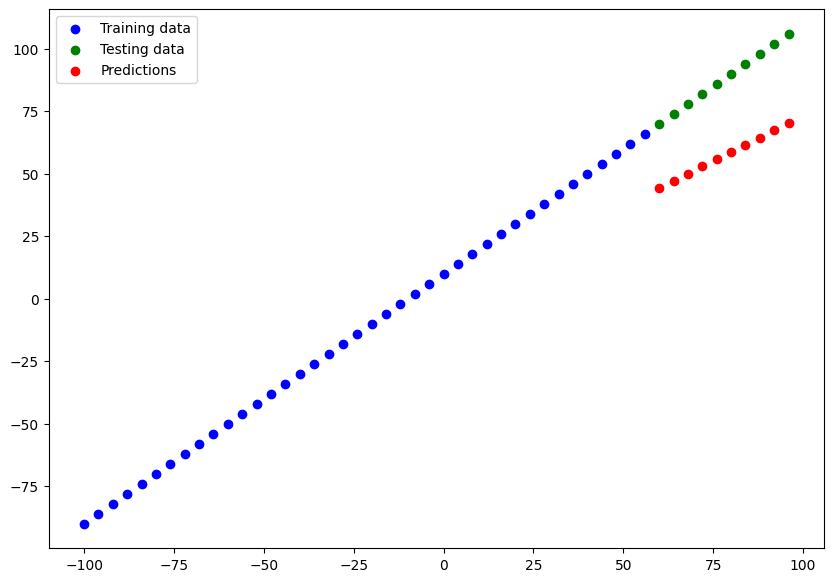

In [ ]:
# Plot for model 1
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [ ]:
# Calc model_1 evaluation metrics
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.712488>,
 <tf.Tensor: shape=(), dtype=float32, numpy=953.7357>)

**Build `model_2`**

* 2 layers
* 100 epochs

In [ ]:
# Model 2

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

model_2.compile(optimizer=tf.keras.optimizers.SGD(),
                loss=tf.keras.losses.mae,
                metrics=["mae"])

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 15ms/step - loss: 42.5963 - mae: 42.5963
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 32.0627 - mae: 32.0627
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 35.3970 - mae: 35.3970
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 14.5208 - mae: 14.5208
Epoch 5/100
2/2 [==============================] - 0s 16ms/step - loss: 20.7558 - mae: 20.7558
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 8.1893 - mae: 8.1893
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 17.5997 - mae: 17.5997
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 17.4213 - mae: 17.4213
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 30.3634 - mae: 30.3634
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 12.4535 - mae: 12.4535
Epoch 11/100
2/2 [==============================] - 0s 8ms

1/1 [==============================] - 0s 41ms/step


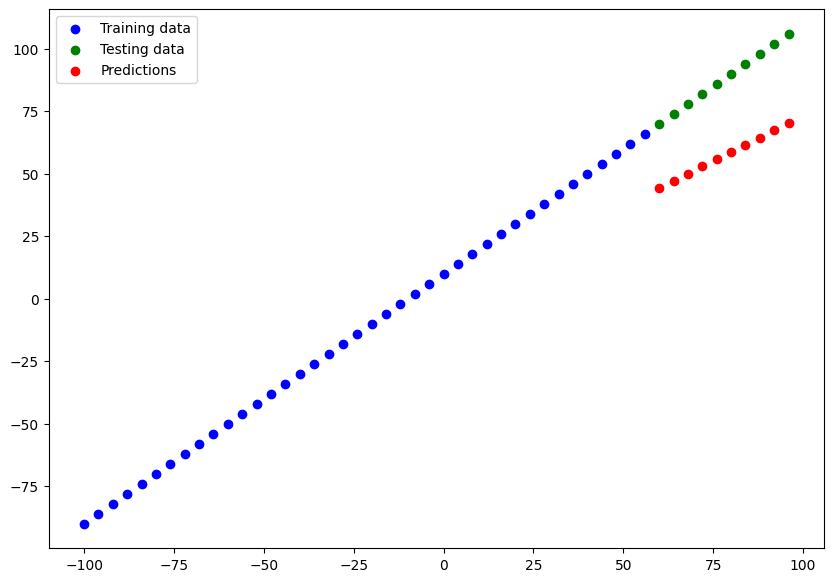

In [ ]:
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [ ]:
# Calculate mae and mse
mae_2 = mae(y_test, y_pred=y_pred_2)
mse_2 = mse(y_test, y_pred=y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=11.0033045>,
 <tf.Tensor: shape=(), dtype=float32, numpy=129.11359>)

**Build `model_3`**:

* 2 layers
* 500 epochs

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1),
])

model_3.compile(optimizer=tf.keras.optimizers.SGD(),
                loss=tf.keras.losses.mae,
                metrics=["mae"])

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 12ms/step - loss: 41.2306 - mae: 41.2306
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 31.4343 - mae: 31.4343
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 35.7599 - mae: 35.7599
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 30.7716 - mae: 30.7716
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 15.6583 - mae: 15.6583
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 12.4210 - mae: 12.4210
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 11.7004 - mae: 11.7004
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 12.0968 - mae: 12.0968
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 37.9153 - mae: 37.9153
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 25.5173 - mae: 25.5173
Epoch 11/500
2/2 [==============================] - 0s 7ms

1/1 [==============================] - 0s 115ms/step


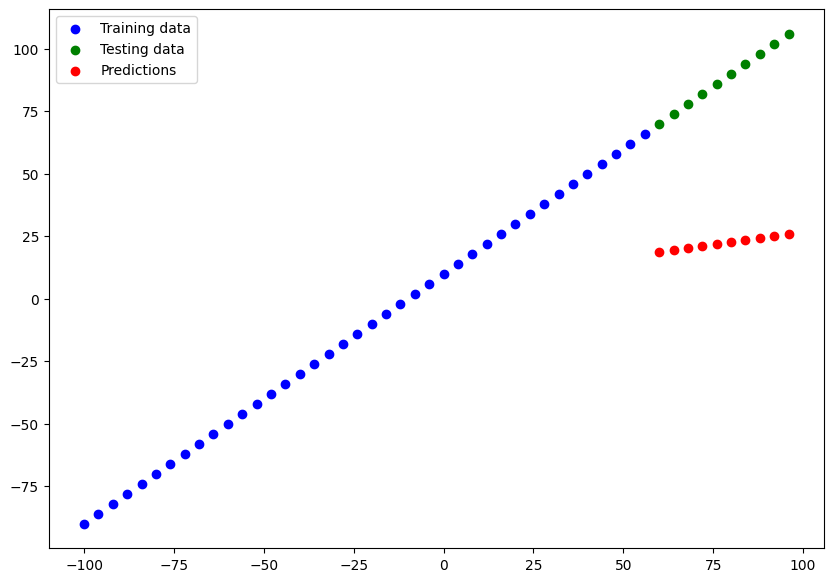

In [ ]:
# Plot it
y_pred_3 = model_3.predict(y_test)
plot_predictions(predictions=y_pred_3)

In [ ]:
# mae and mse
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=65.59576>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4386.8555>)

### Comparing the results of our experiments

We've run a few experiments, let's compare the results

In [ ]:
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["Model", "MAE", "MSE"])
all_results

,Model,MAE,MSE
0,model_1,30.712488,953.735718
1,model_2,11.003304,129.113586
2,model_3,65.595757,4386.855469


Looks like `model_2` performed the best..

In [ ]:
model_2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 50)                100       
                                                                 
 dense_19 (Dense)            (None, 1)                 51        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Traicking your experiments

One really good habit in ML modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running a tone of experiments.

Luckily, there are tools to help us!

**Resource:** As you build more models, you'll want to look into using:

* TensorBoard - a component of the Tensorflow lib to help track modelling experiments.
* Weights & Biases - a tool of tracking all of kinds of ML experiments (plugs straight into TensorBoard)

## Saving our models

Saving our models allow us to use them outside of Google Colab such as in a web app or a mobile app.

There are 2 main formats we can save our model's too:
1. The SavedModel format
2. The HFD5 format

In [ ]:
# SavedModel
model_2.save("best_model_SavedModel")

In [ ]:
# HFD5
model_2.save("model_2.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading a saved model

In [ ]:
# Load a SavedFormat
loaded_SavedFormat_model = tf.keras.models.load_model("best_model_SavedModel")
loaded_SavedFormat_model.summary() == model_2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 50)                100       
                                                                 
 dense_19 (Dense)            (None, 1)                 51        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 50)                100       
                                                                 
 dense_19 (Dense)            (None, 1)                 51        
                                                          

True

In [ ]:
# Compare model_2 predictions with SavedModel predictions
model_2_pred = model_2.predict(X_test)
loaded_SavedFormat_model_pred = loaded_SavedFormat_model.predict(X_test)

model_2_pred == loaded_SavedFormat_model_pred

1/1 [==============================] - 0s 15ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Load .h5
loaded_h5_model = tf.keras.models.load_model("model_2.h5")
loaded_h5_model.summary() == model_2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 50)                100       
                                                                 
 dense_19 (Dense)            (None, 1)                 51        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 50)                100       
                                                                 
 dense_19 (Dense)            (None, 1)                 51        
                                                          

True

In [ ]:
# Compare model_2 predictions with SavedModel predictions
loaded_h5_model_pred = loaded_h5_model.predict(X_test)

model_2_pred == loaded_h5_model_pred

1/1 [==============================] - 0s 60ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a file from Google Colab

In [ ]:
from google.colab import files

# files.download("model_2.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file from Google Colab to Google Drive
# !cp path /content/drive/...

## A larger example

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance["sex"], insurance['age']

(0       female
 1         male
 2         male
 3         male
 4         male
          ...  
 1333      male
 1334    female
 1335    female
 1336    female
 1337    female
 Name: sex, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [ ]:
# one-hot encode db
insurance_ohe_hot = pd.get_dummies(insurance)
insurance_ohe_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X and y values (features and labels)
x_dataset = insurance_ohe_hot.drop("charges", axis=1)
y_dataset = insurance_ohe_hot["charges"]

x_dataset, y_dataset

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0      19  27.900         0           1         0          0           1   
 1      18  33.770         1           0         1          1           0   
 2      28  33.000         3           0         1          1           0   
 3      33  22.705         0           0         1          1           0   
 4      32  28.880         0           0         1          1           0   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1333   50  30.970         3           0         1          1           0   
 1334   18  31.920         0           1         0          1           0   
 1335   18  36.850         0           1         0          1           0   
 1336   21  25.800         0           1         0          1           0   
 1337   61  29.070         0           1         0          0           1   
 
       region_northeast  region_northwest  region_southeast  region_southw

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_dataset, y_dataset, test_size=0.2, random_state=42)
x_train, x_test, y_train, y_test

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 560    46  19.950         2           1         0          1           0   
 1285   47  24.320         0           1         0          1           0   
 1142   52  24.860         0           1         0          1           0   
 969    39  34.320         5           1         0          1           0   
 486    54  21.470         3           1         0          1           0   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1095   18  31.350         4           1         0          1           0   
 1130   39  23.870         5           1         0          1           0   
 1294   58  25.175         0           0         1          1           0   
 860    37  47.600         2           1         0          0           1   
 1126   55  29.900         0           0         1          1           0   
 
       region_northeast  region_northwest  region_southeast  region_southw

In [ ]:
# Build a neural network

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(
    optimizer="SGD",
    loss="mae",
    metrics=["mae"])

insurance_model.fit(x_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8616.4678 - mae: 8616.4678
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7881.8169 - mae: 7881.8169
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7609.1470 - mae: 7609.1470
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7691.9878 - mae: 7691.9878
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7672.9072 - mae: 7672.9072
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7604.8179 - mae: 7604.8179
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7579.3550 - mae: 7579.3550
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7711.3179 - mae: 7711.3179
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7566.9111 - mae: 7566.9111
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7731.8838 - mae: 7731.8838

In [ ]:
# Evaluate it
insurance_model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7694.2739 - mae: 7694.2739


[7694.27392578125, 7694.27392578125]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Let's improve it!

#### Stop processing if the result doesn't change gradually

`callbacks= tf.keras.callbacks.EarlyStopping(monitor="loss", patience=10)` -> history (model.fit)

In [299]:
insurance_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(11,)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(
    optimizer= tf.keras.optimizers.experimental.Nadam(),
    loss=tf.keras.losses.mae,
    metrics=["mae"]
)

history = insurance_model.fit(x_train, y_train, epochs=200)
# , callbacks=tf.keras.callbacks.EarlyStopping(monitor="loss", patience=10)

Epoch 1/200
34/34 [==============================] - 2s 4ms/step - loss: 13312.9590 - mae: 13312.9590
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 13142.2207 - mae: 13142.2207
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12608.6318 - mae: 12608.6318
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 11370.9199 - mae: 11370.9199
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 9444.8721 - mae: 9444.8721
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 7815.5117 - mae: 7815.5117
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 7426.3032 - mae: 7426.3032
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 7396.7412 - mae: 7396.7412
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 7369.8857 - mae: 7369.8857
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 7344.4219 - mae: 7

In [301]:
insurance_model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 2331.8945 - mae: 2331.8945


[2331.89453125, 2331.89453125]

Text(0.5, 0, 'epochs')

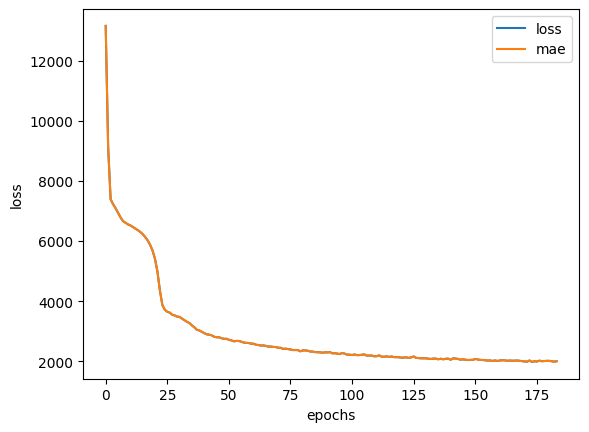

In [271]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Preprocessing data (normalization and stadartization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

In [ ]:
x_dataset["age"].plot(kind="hist")

In [281]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Sikit-Learn

In [283]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create x and y values
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column tranformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [293]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [290]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [291]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encoded.
Let's built a neural network!

In [297]:
# Build a model

tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(11,)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(
    optimizer=tf.keras.optimizers.experimental.Nadam(learning_rate=0.01),
    loss=tf.keras.losses.mae,
    metrics=["mae"]
)

history = insurance_model.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 4ms/step - loss: 12891.9219 - mae: 12891.9219
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 8619.6387 - mae: 8619.6387
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 7393.2686 - mae: 7393.2686
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 6378.4556 - mae: 6378.4556
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 4765.6118 - mae: 4765.6118
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 3709.4216 - mae: 3709.4216
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 3510.9316 - mae: 3510.9316
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 3388.0437 - mae: 3388.0437
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 3282.7153 - mae: 3282.7153
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 3247.6252 - mae: 3247.62

In [298]:
# Evaluate on normalized data
insurance_model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 1763.7584 - mae: 1763.7584


[1763.7584228515625, 1763.7584228515625]

In [302]:
# Insurance model_before results
# 9/9 [==============================] - 0s 3ms/step - loss: 2331.8945 - mae: 2331.8945

# Neural network regression with TensorFlow Exercises

## Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.

In [409]:
X = np.arange(-10000, 10000, 14)
y = X * 2 + 2
X, y

(array([-10000,  -9986,  -9972, ...,   9964,   9978,   9992]),
 array([-19998, -19970, -19942, ...,  19930,  19958,  19986]))

In [410]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(array([-5716,  5946, -9566, ...,  8116,  2040,  5764]),
 array([-8278,  6646, -3532, -5086,  4126,  -690,   584, -2622, -9020,
        -2244, -5352,  3916,  6548,  4924, -5660,  8298, -6948, -8908,
        -6220, -9286, -9062, -4820,  6296, -1194, -8936, -5184, -7424,
         1172,  6982,  2068, -7718,  5358,  7514,   304,  3482,  6996,
        -9384, -7228,  8452,  5932,  4182,  1928,  7108,  5288,  9320,
        -5254, -9594,  2614,  5120, -4652,  -886, -9314,   374, -1418,
          430,  1396, -4190,  7878,  2236,  1368,  5596,  1284,  2390,
         1536, -6542,  4882,  5792,  8494,  6254,  1382,  5862,  4658,
        -7312,  6870,  2572,  1802, -8586,   696, -2076,  9376,  4322,
         6366, -5954, -1614,  7360, -5044,  4504, -6766, -5842,  1746,
         1564,  3902,  4406,  6086,  5582, -3042, -1740, -9398, -1684,
        -4988,  5232, -6920,  3034,  7808,  -914, -1068, -3658,  9068,
        -7648,  2138,  6114, -3854, -9090, -6682, -1292, -2552, -1334,
        -6654, -3196

In [411]:
predict_number_1 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(1,)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

predict_number_1.compile(
    optimizer=tf.keras.optimizers.experimental.Nadam(learning_rate=0.01),
    loss=tf.keras.losses.mae,
    metrics=["mae"]
)

history = predict_number_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
36/36 [==============================] - 1s 4ms/step - loss: 3614.4414 - mae: 3614.4414
Epoch 2/100
36/36 [==============================] - 0s 4ms/step - loss: 131.1104 - mae: 131.1104
Epoch 3/100
36/36 [==============================] - 0s 4ms/step - loss: 103.0062 - mae: 103.0062
Epoch 4/100
36/36 [==============================] - 0s 3ms/step - loss: 95.1381 - mae: 95.1381
Epoch 5/100
36/36 [==============================] - 0s 3ms/step - loss: 87.1229 - mae: 87.1229
Epoch 6/100
36/36 [==============================] - 0s 3ms/step - loss: 92.2133 - mae: 92.2133
Epoch 7/100
36/36 [==============================] - 0s 3ms/step - loss: 91.1220 - mae: 91.1220
Epoch 8/100
36/36 [==============================] - 0s 3ms/step - loss: 88.9161 - mae: 88.9161
Epoch 9/100
36/36 [==============================] - 0s 3ms/step - loss: 93.8304 - mae: 93.8304
Epoch 10/100
36/36 [==============================] - 0s 3ms/step - loss: 87.3539 - mae: 87.3539
Epoch 11/100
36/36 [===========

In [412]:
predict_number_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 118.1077 - mae: 118.1077


[118.10774993896484, 118.10774993896484]

In [413]:
# 9/9 [==============================] - 0s 4ms/step - loss: 160.7230 - mae: 160.7230

## Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?

In [414]:
predict_model_2 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(1,)),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1),
])

predict_model_2.compile(
    optimizer=tf.keras.optimizers.experimental.Nadam(learning_rate=0.01),
    loss=tf.keras.losses.mae,
    metrics=["mae"]
)

history = predict_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
36/36 [==============================] - 3s 4ms/step - loss: 2337.1372 - mae: 2337.1372
Epoch 2/100
36/36 [==============================] - 0s 4ms/step - loss: 532.7180 - mae: 532.7180
Epoch 3/100
36/36 [==============================] - 0s 4ms/step - loss: 402.0669 - mae: 402.0669
Epoch 4/100
36/36 [==============================] - 0s 4ms/step - loss: 363.8160 - mae: 363.8160
Epoch 5/100
36/36 [==============================] - 0s 4ms/step - loss: 371.8879 - mae: 371.8879
Epoch 6/100
36/36 [==============================] - 0s 5ms/step - loss: 375.5704 - mae: 375.5704
Epoch 7/100
36/36 [==============================] - 0s 4ms/step - loss: 357.2563 - mae: 357.2563
Epoch 8/100
36/36 [==============================] - 0s 4ms/step - loss: 343.5412 - mae: 343.5412
Epoch 9/100
36/36 [==============================] - 0s 4ms/step - loss: 322.4287 - mae: 322.4287
Epoch 10/100
36/36 [==============================] - 0s 4ms/step - loss: 328.2159 - mae: 328.2159
Epoch 11/100
36/3

In [415]:
predict_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 1s 9ms/step - loss: 188.4540 - mae: 188.4540


[188.4540252685547, 188.4540252685547]

In [416]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data()

In [417]:
X_train.shape

(404, 13)

In [418]:
y_train.shape

(404,)

In [419]:
X_train.shape, X_train.ndim

((404, 13), 2)

In [420]:
# y_train.shape, y_train.ndim
y_train = tf.reshape(y_train, shape=(len(y_train), 1))
y_test = tf.reshape(y_test, shape=(len(y_test), 1))

In [430]:
house_price = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(13,)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

house_price.compile(
    optimizer=tf.keras.optimizers.Nadam(),
    loss=tf.keras.losses.mae,
    metrics=["mae"]
)

house_price.fit(X_train, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 3s 7ms/step - loss: 9.1029 - mae: 9.1029
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 5.4860 - mae: 5.4860
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 5.2640 - mae: 5.2640
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 5.2264 - mae: 5.2264
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 5.1433 - mae: 5.1433
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 5.0564 - mae: 5.0564
Epoch 7/100
13/13 [==============================] - 0s 6ms/step - loss: 5.0724 - mae: 5.0724
Epoch 8/100
13/13 [==============================] - 0s 6ms/step - loss: 4.9696 - mae: 4.9696
Epoch 9/100
13/13 [==============================] - 0s 6ms/step - loss: 4.9882 - mae: 4.9882
Epoch 10/100
13/13 [==============================] - 0s 6ms/step - loss: 4.8873 - mae: 4.8873
Epoch 11/100
13/13 [==============================] - 0s 4m

In [431]:
house_price.evaluate(X_test, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 4.3706 - mae: 4.3706


[4.370573043823242, 4.370573043823242]